__Data Source:__ [Kaggle](https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data?select=Churn_Modelling.csv)

In [ ]:
!python -V

Python 3.7.13


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("data/Churn_Modelling.csv")

print(f"data shape: {data.shape}")
print("\n")

data.head()

data shape: (10000, 14)




,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


- Row number and Customer ID and Surname are irrelevant
- A credit score is a number between 300–850 that depicts a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders. A credit score is based on credit history: number of open accounts, total levels of debt, and repayment history, and other factors. Lenders use credit scores to evaluate the probability that an individual will repay loans in a timely manner. __This col may be very useful for analysis.__
- The rest of the columns will also be analysed.

In [ ]:
data.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
assert(len(data.columns)==11)

In [ ]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

The data is free of null values. The cell below double checks if there are no other symbols of NaN existing in the data, like "?" or "-" or "nan"

In [ ]:
vars = ["?", "-", "nan"]
for var in vars:
  print(data[data.eq(var).any(1)])

Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []
Empty DataFrame
Columns: [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


Since none of the above exists, we are good.

__Data Analysis__

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


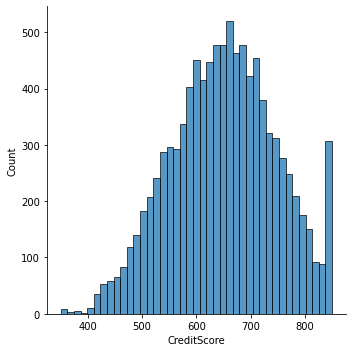

In [ ]:
sns.displot(x="CreditScore", data=data);

From an overview, most of the customers have a credit score ranging from 550 - 750.

We'll check the credit score in relation to churn rate.

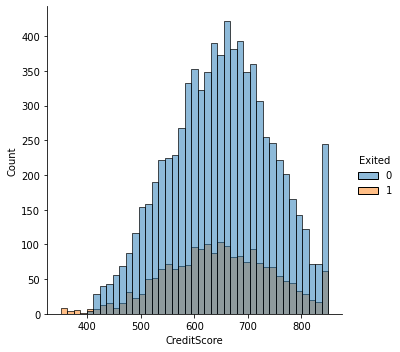

In [ ]:
sns.displot(x="CreditScore", data=data, hue="Exited");

Those who exited are a smaller fraction of the entire number of customers. And a few of them were on the lowest bars of the creditscore chart. 

We will compare other columns too to this Existed column to find patterns.

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

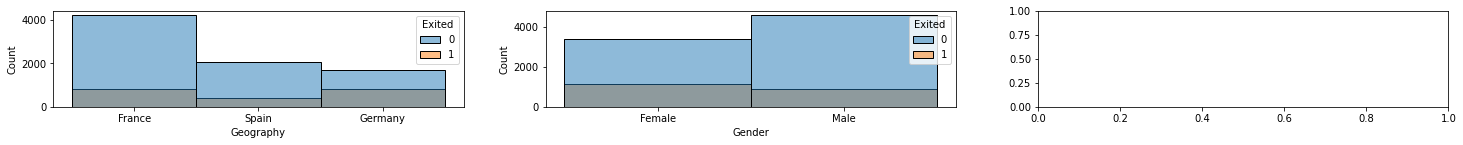

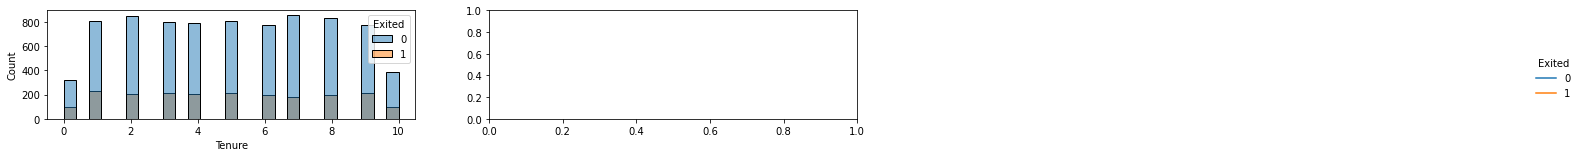

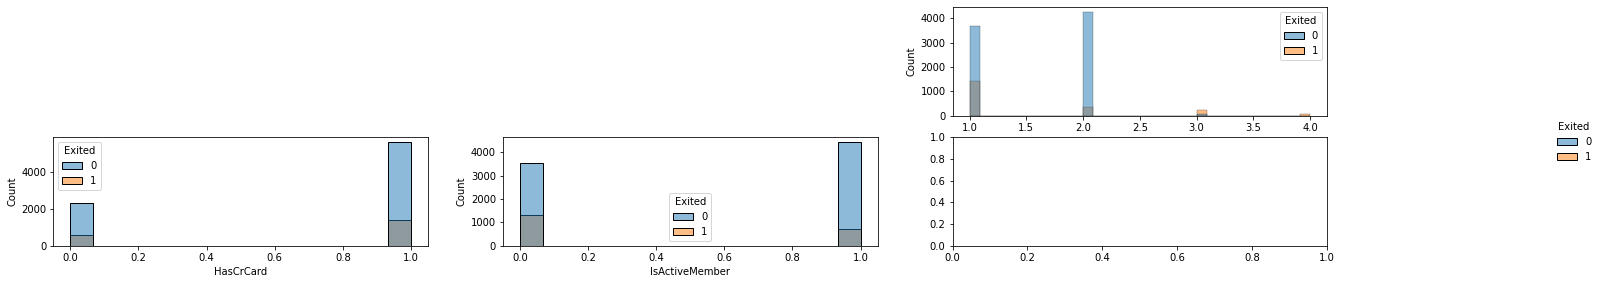

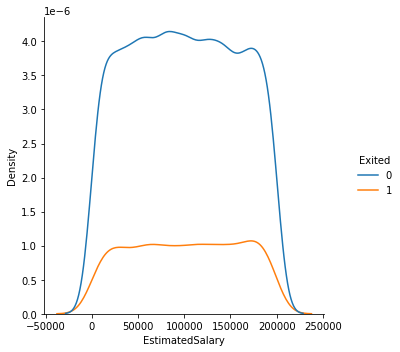

In [ ]:
plt.gcf().set_size_inches(25, 6)

plt.subplot(3, 3, 1)
sns.histplot(x="Geography", data=data, hue="Exited");

plt.subplot(3, 3, 2)
sns.histplot(x="Gender", data=data, hue="Exited");

plt.subplot(3, 3, 3)
sns.displot(x="Age", data=data, hue="Exited", kind="kde");

plt.gcf().set_size_inches(25, 6)
plt.subplot(3, 3, 4)
sns.histplot(x="Tenure", data=data, hue="Exited");

plt.subplot(3, 3, 5)
sns.displot(x="Balance", data=data, hue="Exited");

plt.subplot(3, 3, 6)
sns.histplot(x="NumOfProducts", data=data, hue="Exited");

plt.gcf().set_size_inches(25, 6)
plt.subplot(3, 3, 7)
sns.histplot(x="HasCrCard", data=data, hue="Exited");

plt.subplot(3, 3, 8)
sns.histplot(x="IsActiveMember", data=data, hue="Exited");

plt.subplot(3, 3, 9)
sns.displot(x="EstimatedSalary", data=data, hue="Exited", kind="kde");